# read in data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [8]:
data=pd.read_csv("train.csv")
data

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False
...,...,...,...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44864,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44865,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44866,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True


In [9]:
data=data.drop(columns=['prompt_name','source','RDizzl3_seven'])

In [10]:
data

,text,label
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0
...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1
44864,"Dear Senator,\n\nI am writing to you today to ...",1
44865,"Dear Senator,\n\nI am writing to you today to ...",1
44866,"Dear Senator,\n\nI am writing to you today to ...",1


# about data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44868 non-null  object
 1   label   44868 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.2+ KB


In [13]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [14]:
data.shape

(44868, 2)

In [15]:
 data['label'].value_counts()

0    27371
1    17497
Name: label, dtype: int64

# Building model

<Axes: >

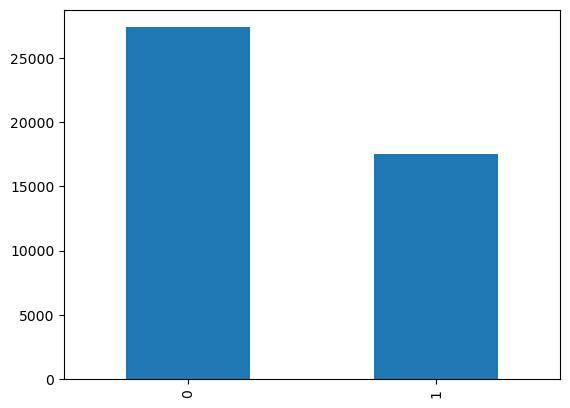

In [17]:
 data['label'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

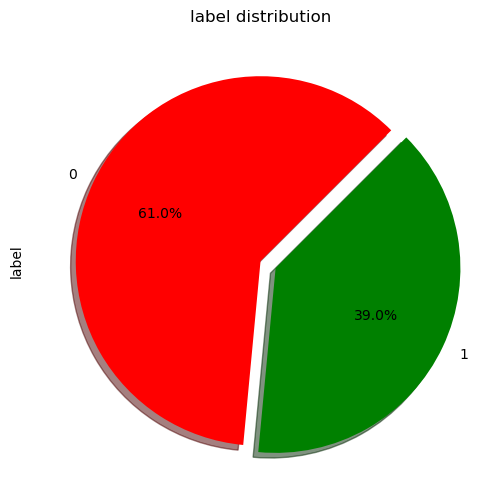

In [18]:
plt.figure(figsize=(10,6))
colors=['red','green']
data['label'].value_counts().plot(kind='pie',autopct='%.1f%%',shadow=True,colors=colors,startangle=45,explode=(0,0.09))
plt.title('label distribution')

# Cleaning data

In [20]:
data['text'][999]

'Is Driving With Cellphones Dangerous?\n\nMany people around the world own and use cellphones. Most of these People also own and operate a motor vehicle. But is it hazardous to use both at the same time? Operating both a cellphone and a vehicle is dangerous and is one of the causes of death on the road. Drivers should be allowed to have their phones in their car but if they are caught using them while behind the wheel, they would get a fine penalty. In the U.S, Different states have different rules and fines. But what can we do to prevent tragedies from happening?\n\nDriving while using a cellphone is a very unsafe and irresponsible act. According to the National Highway Traffic Safety Administration (NHTSA), "Using a cell phone while driving creates enormous potential for deaths and injuries on U.S. roads. In 2017 alone, 3,166 people were killed in motor vehicle crashes involving distracted drivers." A large amount of people have been injured and even killed by irresponsible drivers w

In [21]:
import re
import nltk 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 

In [23]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')
def preprocessing(text):
    text=re.sub('<[^>]*>', '',text)
    emojis=emoji_pattern.findall(text)
    text=re.sub('[\W+]',' ',text.lower()) +' '.join(emojis).replace('-', '')

    prter=PorterStemmer()
    text=[prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [39]:
data['text']=data['text'].apply(lambda x: preprocessing(x))

In [40]:
data['text']

0        phone modern human today alway phone alway pho...
1        essay explain driver abl use electron devic op...
2        drive use cellular devic today societi thought...
3        phone drive driver abl use phone oper vehicl d...
4        cell phone oper drive abil stay connect peopl ...
                               ...                        
44863    dear senat write today express view elector co...
44864    dear senat write today express support abolish...
44865    dear senat write today express strong support ...
44866    dear senat write today express strong support ...
44867    dear senat write today express strong support ...
Name: text, Length: 44868, dtype: object

# TF-IDF Vertorizer

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.text)

# Training Models

In [57]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.5)

In [72]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,max_iter=500).fit(xtrain,ytrain)
y_pred=clf.predict(xtest)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [69]:
# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(ytest,y_pred)
# cm

array([[13689,    67],
       [  116,  8562]], dtype=int64)

# Accuracy

In [62]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(ytest,y_pred))

Accuracy: 0.9918427387001872
